# Numerical analysis

In [1]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
def eps_fock(nmax, r):
    return 1 - (1/np.cosh(r))*sum([((np.tanh(r)**2)/4)**k*factorial(2*k)/(factorial(k)**2) for k in range(nmax//2 + 1)])

In [7]:
eps_focks = [eps_fock(nmax, np.log(2)) for nmax in np.arange(12)]
np.save('eps_focks.npy', eps_focks)

In [4]:
def eps_sq(nmax, r):
    return ((np.cosh(r) - 1)/(np.cosh(r) + 1))**(nmax + 1)

In [8]:
eps_sqs = [eps_sq(nmax, np.log(2)) for nmax in np.arange(12)]
np.save('eps_sqs.npy', eps_sqs)

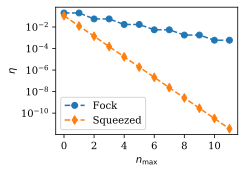

In [6]:
with plt.style.context('paper.mplstyle'):
    fig, ax = plt.subplots(figsize=(3.5,2.5))
    ax.semilogy(eps_focks, linestyle='--', marker='o', label='Fock')
    ax.semilogy(eps_sqs, linestyle='--', marker='d', label='Squeezed')
    ax.set_xlabel(r'$n_\mathrm{max}$')
    ax.set_ylabel(r'$\eta$')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.legend()
    plt.tight_layout()
    plt.savefig('discarded-population.pdf', bbox_inches='tight', pad_inches=0.02)